### Movie Review Sentiment Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM
from keras import backend as K

Using TensorFlow backend.


In [0]:
# Import data set of movie reviews from IMDB 
from keras.datasets import imdb

In [4]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 20000,
                                                   skip_top = 0,
                                                   maxlen = None,
                                                   start_char=1,
                                                   oov_char=2,
                                                   index_from=3)

17465344/17464789 [==============================] - 0s 0us/step


#### Examine the data

In [5]:
X_test.shape

(25000,)

In [0]:
# the label column takes on a value of either 0 (negative review) or 1 (positive review)
y_test.shape

(25000,)

In [0]:
X_train.shape

(25000,)

In [6]:
len(X_train[4])

147

In [7]:
idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
len(idx)

88584

In [0]:
# build a dictionary where the key will be the number and the value will be the word associated with that number.
# shift the count by 3 since the first four indices are reserved for special cases 

rev_idx = {v+3:k for k,v in idx.items()}

In [0]:
rev_idx[0] = 'padding_char'
rev_idx[1] = 'start_char'
rev_idx[2] = 'oov_char'
rev_idx[3] = 'unk_char'

In [0]:
# see the actual reviews
review = [x for x in X_train[10]]
review4 = ' '.join([rev_idx[y] for y in X_train[10]])

In [12]:
review4

"start_char french horror cinema has seen something of a revival over the last couple of years with great films such as inside and oov_char romance bursting on to the scene maléfique preceded the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made maléfique was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is complimented by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named carrère sent to prison for fraud he is put in a cell with three others the quietly insane oov_char body building transvestite marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old journal after translating part of it they soon realise its magica

In [0]:
lengths = [len(x) for x in X_train]

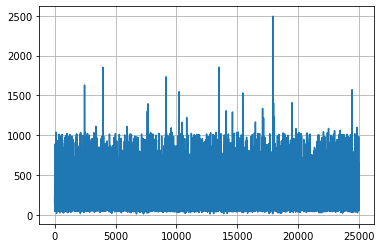

In [0]:
# examine review length distribution
plt.plot(np.linspace(0,len(X_train)-1,len(X_train)),lengths)
plt.grid()

In [0]:
# a tool to pad sequences to the same length (we will denote as 'maxlen'). 
# If the sequence is too short, it will fill empty spaces with some value (0 by default).

from keras.preprocessing.sequence import pad_sequences

In [0]:
maxlen = 75

X_train_pad = pad_sequences(X_train,maxlen = maxlen,padding = 'post')
X_test_pad = pad_sequences(X_test,maxlen = maxlen,padding = 'post')


In [0]:
X_train_pad.shape

(25000, 75)

In [0]:
# get the maximum value in X_train_pad so we don't feed unnecessary words to the Embedding layer
max_feature = max([max(x) for x in X_train_pad]+[max(x) for x in X_test_pad])

#### Build a Recurrent neural net model with an Embedding layer

In [0]:
K.clear_session()

model = Sequential()

# the Embedding layer maps integers (word counterparts) to dense vectors of fixed size (128 in this case)
model.add(Embedding(max_feature,128))
model.add(LSTM(64,dropout = 0.2,recurrent_dropout = 0.2))
# the activation function is sigmoid because we get a binary value for a movie review
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer ='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
# Note: because the model is quite complex, it is advisable to run this code on a cloud with GPU acceleration

model.fit(X_train_pad,y_train,
          epochs = 5,
          validation_split = 0.3,
          batch_size = 32)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 17500 samples, validate on 7500 samples
Epoch 1/5
17500/17500 [==============================] - 82s 5ms/step - loss: 0.4942 - accuracy: 0.7580 - val_loss: 0.3987 - val_accuracy: 0.8253
Epoch 2/5
17500/17500 [==============================] - 83s 5ms/step - loss: 0.3137 - accuracy: 0.8715 - val_loss: 0.4145 - val_accuracy: 0.8157
Epoch 3/5
17500/17500 [==============================] - 83s 5ms/step - loss: 0.2296 - accuracy: 0.9106 - val_loss: 0.4373 - val_accuracy: 0.8217
Epoch 4/5
17500/17500 [==============================] - 83s 5ms/step - loss: 0.1550 - accuracy: 0.9433 - val_loss: 0.5255 - val_accuracy: 0.7989
Epoch 5/5
17500/17500 [==============================] - 82s 5ms/step - loss: 0.1147 - accuracy: 0.9594 - val_loss: 0.5593 - val_accuracy: 0.8148


In [0]:
score,acc = model.evaluate(X_test_pad,y_test)

print('score = ',score)
print('accuracy = {}'.format(acc))

25000/25000 [==============================] - 10s 388us/step
score =  0.5720979055309295
accuracy = 0.8118000030517578


In [0]:
# Hence, in 5 epochs we have achieved 81% accuracy.